### Load and allign images

In [1]:
import scipy.signal as sig
import skimage as sk
import skimage.io as skio
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
import skimage.transform as sktr

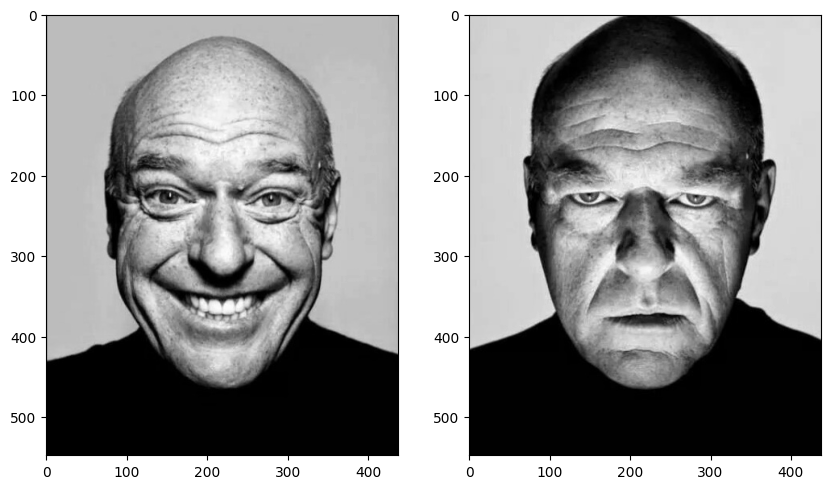

In [439]:
im1 = cv2.imread("./images/happyGuyAligned.jpg", cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('./images/angryGuyAligned.jpg', cv2.IMREAD_GRAYSCALE)
im1 = im1[100:, 10:]
im2 = im2[100:, 10:]
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].imshow(im1, cmap='grey')
axs[1].imshow(im2, cmap='grey')

In [452]:
#Processing low pass
gaussian = cv2.getGaussianKernel(10,5)
gaussian = gaussian * gaussian.T

# lowPassRGB = np.array([sig.convolve2d(im2[:,:,i], gaussian, mode='same') for i in range(0, 3)])
# lowPassRGB = np.array([lowPassRGB[i]/np.max(lowPassRGB[i])*255 for i in range(0,3)])

lowPassRGB = sig.convolve2d(im2, gaussian, mode='same')
lowPassRGB = lowPassRGB/np.max(lowPassRGB)

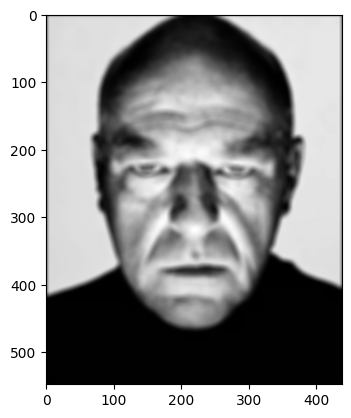

In [453]:
# fig, axs = plt.subplots(1, 3, figsize=(10, 20))
# axs[0].imshow(lowPassRGB[0], cmap='grey')
# axs[1].imshow(lowPassRGB[1], cmap='grey')
# axs[2].imshow(lowPassRGB[2], cmap='grey')
plt.imshow(lowPassRGB, cmap="grey")

In [454]:
#Processing high pass
gaussian = cv2.getGaussianKernel(20, 10)
gaussian = gaussian * gaussian.T
filter = sig.unit_impulse((20,20), idx='mid') - gaussian
# highPassRGB = np.array([sig.convolve2d(im1[:,:,i], filter, mode='same') for i in range(0, 3)])
# highPassRGB[highPassRGB < 0] = np.abs(highPassRGB[highPassRGB < 0])

# highPassRGB = highPassRGB + 0.12
# highPassRGB = np.array([highPassRGB[i]/np.max(highPassRGB[i]) for i in range(0,3)])
highPassRGB = sig.convolve2d(im1, filter, mode='same')
highPassRGB = highPassRGB/np.max(highPassRGB)

In [455]:
np.max(highPassRGB)

np.float64(1.0)

In [395]:
# highPassRGB = np.array([im1[:,:,i] * highPassRGB[i] for i in range(0,3)])

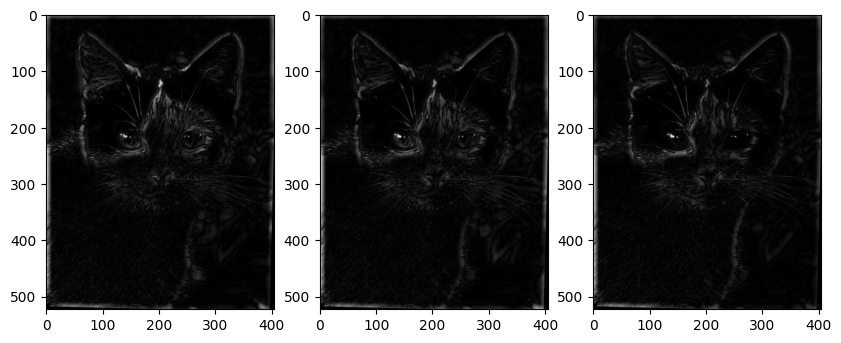

In [396]:
# fig, axs = plt.subplots(1, 3, figsize=(10, 20))
# axs[0].imshow(highPassRGB[0], cmap='grey')
# axs[1].imshow(highPassRGB[1], cmap='grey')
# axs[2].imshow(highPassRGB[2], cmap='grey')

# plt.imshow(highPassRGB, cmap='grey')



In [414]:
# highPassPseudoColor = np.array([highPassRGB,highPassRGB,highPassRGB])
# highPassPseudoColor = highPassPseudoColor/np.max(highPassPseudoColor) * 255

In [415]:
# np.sum(highPassPseudoColor)

np.float64(2376802.6313011176)

In [418]:
# highPassPseudoColor.shape

(3, 523, 405)

In [463]:
#Blending
mix = highPassRGB * 0.25 + lowPassRGB
mix = mix/np.max(mix)


In [424]:
np.max(mix[0])

np.float64(1.0)

True

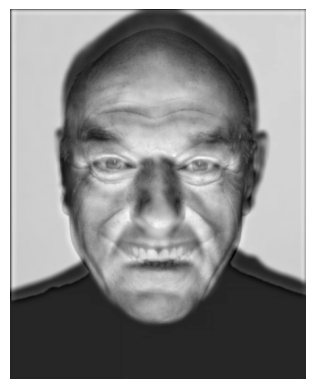

In [468]:
# mixColored = np.clip(np.stack((mix[0],mix[1],mix[2]), axis=2), 0, 1)
plt.axis('off')
plt.imshow(mix, cmap='grey')
# cv2.imwrite('./webImages/part2.2/happyAngerGuyHybrid.png', mix*255)

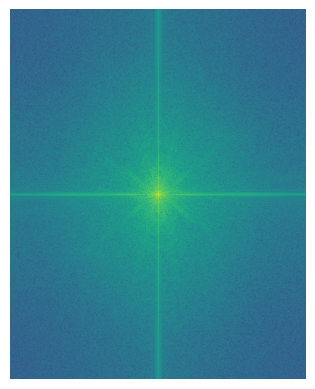

In [477]:
plt.axis('off')
fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(mix))))
plt.imshow(fft)
plt.imsave('./webimages/part2.2/happyAngryGuyHybridFFT.jpg', fft)